In [1273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [1274]:
# {'borough_encode': {'Bronx': 0, 'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Staten Island': 4}})

In [1275]:
# import data
data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/main_dataset.csv')
data.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,N,bars,bbq,breakfast_brunch,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [1276]:
data.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,N,bars,bbq,breakfast_brunch,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [1277]:
neighborhood_data = data.iloc[:, 0:4]
neighborhood_data.head()

,borough,neighborhood,longitude,latitude
0,Bronx,Wakefield,-73.847201,40.894705
1,Bronx,Co-op City,-73.829939,40.874294
2,Bronx,Eastchester,-73.827806,40.887556
3,Bronx,Fieldston,-73.905643,40.895437
4,Bronx,Riverdale,-73.912585,40.890834


In [1278]:
venue_freq = data.copy()
venue_freq = venue_freq.iloc[:, 46:]
venue_freq['neighborhood'] = data['neighborhood'] 

fixed_columns = [venue_freq.columns[-1]] + list(venue_freq.columns[:-1])
venue_freq = venue_freq[fixed_columns]
venue_freq.head()

,neighborhood,accounting,art_gallery,bakery,bank,bar,beauty_salon,bicycle_store,book_store,bowling_alley,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Wakefield,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Co-op City,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Eastchester,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Fieldston,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Riverdale,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [1279]:
num_top_venues = 5

In [1280]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1281]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = venue_freq['neighborhood']

for ind in np.arange(venue_freq.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venue_freq.iloc[ind, :], num_top_venues)


In [1282]:
neighborhoods_venues_sorted2 = neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Wakefield,school,church,accounting,night_club,drugstore
1,Co-op City,doctor,dentist,local_government_office,health,secondary_school
2,Eastchester,general_contractor,car_repair,car_dealer,accounting,home_goods_store
3,Fieldston,health,lawyer,doctor,dentist,home_goods_store
4,Riverdale,doctor,dentist,health,real_estate_agency,synagogue


In [1283]:
venue_clustering = venue_freq.drop('neighborhood', axis=1)

In [1284]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

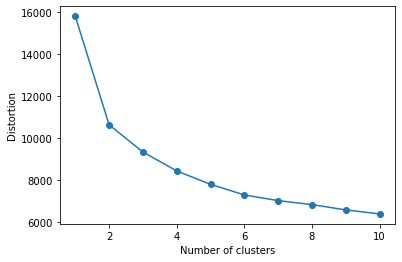

In [1285]:
plot_distortion(venue_clustering)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

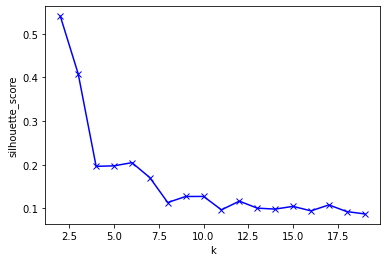

In [1286]:
from sklearn.metrics import silhouette_score
sil = []
k_sil = range(2,20)
for k in k_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(venue_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(venue_clustering, labels, metric = 'euclidean'))

plt.plot(k_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

In [1287]:
kclusters = 8

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venue_clustering)

kmeans.labels_[0:10] 

array([7, 4, 7, 4, 4, 1, 3, 7, 6, 7], dtype=int32)

In [1288]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_merged = neighborhood_data.copy()
neighborhoods_merged = neighborhoods_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

neighborhoods_merged.head()

,borough,neighborhood,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,-73.847201,40.894705,7,school,church,accounting,night_club,drugstore
1,Bronx,Co-op City,-73.829939,40.874294,4,doctor,dentist,local_government_office,health,secondary_school
2,Bronx,Eastchester,-73.827806,40.887556,7,general_contractor,car_repair,car_dealer,accounting,home_goods_store
3,Bronx,Fieldston,-73.905643,40.895437,4,health,lawyer,doctor,dentist,home_goods_store
4,Bronx,Riverdale,-73.912585,40.890834,4,doctor,dentist,health,real_estate_agency,synagogue


# Map

In [1289]:
from geopy.geocoders import Nominatim

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [1290]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhood_data['latitude'], neighborhood_data['longitude'], neighborhood_data['borough'], neighborhood_data['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [1291]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['latitude'], neighborhoods_merged['longitude'], neighborhoods_merged['neighborhood'],neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1292]:
y_km = km.fit_predict(venue_clustering)

In [1293]:
cluster0 = neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 0, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]
cluster1 = neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 1, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]
cluster2 = neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 2, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

In [1294]:
print(cluster0['1st Most Common Venue'].value_counts())

bar           4
lodging       2
restaurant    2
Name: 1st Most Common Venue, dtype: int64


In [1295]:
cluster1['1st Most Common Venue'].value_counts()

restaurant            23
lodging                5
school                 2
lawyer                 2
bar                    2
doctor                 1
travel_agency          1
secondary_school       1
tourist_attraction     1
university             1
store                  1
pharmacy               1
jewelry_store          1
Name: 1st Most Common Venue, dtype: int64

In [1296]:
cluster2['1st Most Common Venue'].value_counts()

doctor    18
Name: 1st Most Common Venue, dtype: int64

# All Categories

In [1297]:
all_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/yelp_not_encoded.csv')
all_data.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,most_popular_restaurant_category,accounting,art_gallery,bakery,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,caribbean,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,delis,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,caribbean,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,N,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,burgers,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [1298]:
all_data_encoded = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/main_dataset.csv')
all_data_encoded.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,N,bars,bbq,breakfast_brunch,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [1299]:
neighborhoods_venues_sorted2.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Wakefield,school,church,accounting,night_club,drugstore
1,Co-op City,doctor,dentist,local_government_office,health,secondary_school
2,Eastchester,general_contractor,car_repair,car_dealer,accounting,home_goods_store
3,Fieldston,health,lawyer,doctor,dentist,home_goods_store
4,Riverdale,doctor,dentist,health,real_estate_agency,synagogue


In [1300]:
all_data_cluster= all_data_encoded.iloc[:, 4:]
all_data_cluster.head()

,population,restaurant_count,N,bars,bbq,breakfast_brunch,burgers,cafes,cantonese,caribbean,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,21242.0,13,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,43752.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11506.0,19,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9287.0,9,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9287.0,14,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0


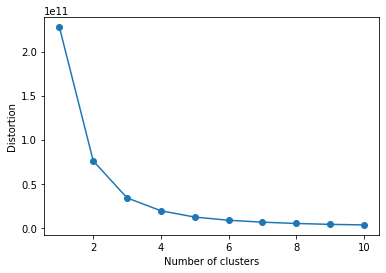

In [1301]:
plot_distortion(all_data_cluster)

In [1302]:
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_data_cluster)

kmeans.labels_[0:10]

array([0, 0, 3, 3, 3, 3, 0, 0, 0, 0], dtype=int32)

In [1303]:
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

all_cat = all_data.copy()
all_cat = all_data.iloc[:, :6]
all_cat = all_cat.join(neighborhoods_venues_sorted2.set_index('neighborhood'), on='neighborhood')

In [1304]:
clusters = all_cat['Cluster Labels'].tolist()
all_cat = all_cat.drop('Cluster Labels', axis=1)
all_cat['clusters'] = clusters
all_cat.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,school,church,accounting,night_club,drugstore,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,doctor,dentist,local_government_office,health,secondary_school,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,general_contractor,car_repair,car_dealer,accounting,home_goods_store,3
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,health,lawyer,doctor,dentist,home_goods_store,3
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,doctor,dentist,health,real_estate_agency,synagogue,3


In [1310]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gnuplot_r(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_cat['latitude'], all_cat['longitude'], all_cat['neighborhood'],all_cat['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters